# TU Delft Energy Storage Course
This is a simple exercise for the calculation of exergy consumtption in the process of carbon dioxide capture and storage.

## Introduction
One solution for the mitigation of the large amount of CO$_2$ emission that is emitted due to human activity is to capture the produced CO$_2$ from the point sources, transporting it to a storage site, and storing it in the subsurface or in the oceans for a long time. The objective of this exercise is to help the students to calculate the minimum energy that is required to fulfill a CCS operation and the energy requirement with the state of the art technology.

## Carbon dioxide capture
Theoretically, a mixture of gases at a low pressure $p_0$, that is low enough to cause the gas behave ideally, can be separated using a set of semipermeable membranes without any change of enthalpy. The separated gases will be at their partial pressure $p_i = x_i p_0$ where $x_i$ is the molar composition of component $i$. However, to pressurize each separated gas to the same pressure $p_0$ from its partial pressure, the gas must be compressed at isothermal condition which requires the following amount of work:
$$ w_i = R T_0 \ln x_i$$
The negative sign of $w_i$ denotes the work that is done on the system. For a typical flue gas mixture, the concentration of CO$_2$ is 0.15 and in the atmosphere it is 4$\times 10^{-4}$. Therefore, the minimum work required for the separation of carbon dioxide can be calculated by:

In [3]:
import numpy as np
R = 8.314 # J/(mol.K)
T0 = 25. + 273.15 # K
x_fg = 0.15 # flue gas CO2 mole fraction
x_atm = 4e-4 # atmospheric CO2 mole fraction
w_fg = R*T0*np.log(x_fg)
w_atm = R*T0*np.log(x_atm)

print('Minimum work to separate CO2 from the flue gas = ', np.format_float_positional(w_fg, precision=0), 'J/mol')
print('Minimum work to separate CO2 from the atmosphere = ', np.format_float_positional(w_atm, precision=0), 'J/mol')


Minimum work to separate CO2 from the flue gas =  -4703. J/mol
Minimum work to separate CO2 from the atmosphere =  -19394. J/mol


In practice, the CO$_2$ separation from a flue gas requires around 4 MJ/kg (and 10 MJ/kg from the atmosphere). These numbers indicate the following efficiency factors for the CO$_2$ separation:

In [4]:
MW_CO2 = 0.044 # kg/mol
w_capture_fg = 4e6 # J/kg
w_capture_atm = 10e6 # J/kg
eta_fg = np.abs(w_fg)/(w_capture_fg*MW_CO2)
eta_atm = np.abs(w_atm)/(w_capture_atm*MW_CO2)
print('Efficiency of CO2 capture from flue gas is ', np.format_float_positional(eta_fg*100, precision=1), '%')
print('Efficiency of CO2 capture from air is ', np.format_float_positional(eta_atm*100, precision=1), '%')

Efficiency of CO2 capture from flue gas is  2.7 %
Efficiency of CO2 capture from air is  4.4 %


Strictly speaking, the above efficiencies shoult be updated to 10-15% since most of the energy consumption in the CO$_2$ capture process is in the form of low quality heat. However, with the current practices a value of 2-5% as calculated above is more realistic.

## Transport
The transport of CO$_2$ are done via pipelines (in supercritical state) or by containers (in liquid state). For the pipeline transportation (sometimes in liquid phase), a specific pressure drop of $\Delta p_s$ = 0.1 to 0.3 bar per kilometere of pipe is reported that leads to an economic transport (although an expensive pipeline). Assuming a 300 km pipeline for the transport of CO$_2$ in the Netherlands, we can calculate the pressure drop across the pipeline. This pressure drop needs to be compenstated for in a compressor station. The minimum work for isothermal compression can be calculated by
$$w_{comp}=RT\ln\frac{p_{out}}{p_{in}}$$
Note that the above equation is for an ideal gas. To include the nonideality, we can calculate the enthalpy change for isothermal compression. In the appendix, the values calculated for ideal and real gases are compared.  
Since we want the CO2 to be transported in supercritical state (or at least supercritical pressure), the output pressure $p_{pipe}$ is set to be 80 bar. The input pressure to the compressore $p_{in}$ is assumed to be the atmospheric pressure or roughly 1 bar. The output pressure from the compressor is calculated by
$$p_{out} = p_{pipe}+L_{pipe}{\Delta p}_{s}$$

# Appendix
The simple equation that is given for the calculation of the minimum compression power requirement at isothermal condition assumes ideal gas behaviour. The general formula for the calculation of mechanical work is
$$w = \int _{v_1}^{v_2} p dv $$
For a liquid phase, e.g. pumping water, we can assume that the fluid is not compressible and therefore the work can be easily calculated by
$$ w_{pump} = v_{liq}(p_2-p_1)$$
where $v_{liq}$ denotes the liquid molar volume. For a real gas, we can integrate the equation numerically by calculating the molar volume of gas in different pressures and constant temperature for an isothermal compressor or constant entropy for an isentropic compressor. For the isentropic condition, the change of entropy is zero and the following equation can also be used for the calculation of the compression energy consumption:
$$w_{comp} = H(p_{out}, S(p_{in}, T_0))-H(p_{in}, T_0)$$
Let's look at the pv plot of CO$_2$ and the area under the curve that shows the required work.

In [5]:
from CoolProp.CoolProp import PropsSI
import matplotlib.pyplot as plt 
T0 = 25+273.15 # K
p_in = 80e5 # Pa
p_out = 4*p_in # Pa
s_in = PropsSI('SMOLAR', 'T', T0, 'P', p_in, 'CO2')
h_in = PropsSI('HMOLAR', 'T', T0, 'P', p_in, 'CO2')
h_out_s = PropsSI('HMOLAR', 'SMOLAR', s_in, 'P', p_out, 'CO2')
h_out_t = PropsSI('HMOLAR', 'T', T0, 'P', p_out, 'CO2')
p = np.linspace(p_in, p_out, 30)
v_t = 1/PropsSI('DMOLAR', 'T', T0, 'P', p, 'CO2')
v_s = 1/PropsSI('DMOLAR', 'SMOLAR', s_in, 'P', p, 'CO2')
dh_s = h_out_s-h_in # isentropic change of enthalpy
dh_t = h_out_t - h_in # isothermal change of enthalpy

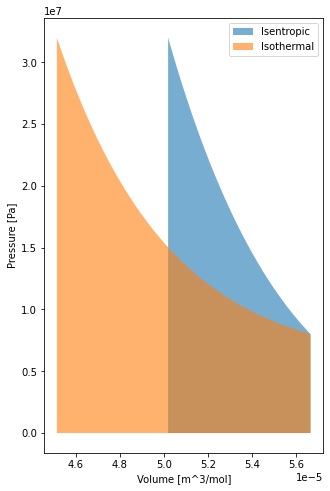

In [6]:
plt.figure(figsize=(5,8))
plt.fill_between(v_s, p, alpha=0.6, label='Isentropic')
plt.fill_between(v_t, p, alpha=0.6, label='Isothermal')
plt.xlabel('Volume [m^3/mol]')
plt.ylabel('Pressure [Pa]')
plt.legend()


In [7]:
w_s = np.trapz(v_s, p)
w_t = np.trapz(v_t, p)
print('isentropic work = ', f'{w_s:0.4g}', 'J/mol')
print('isothermal work = ', f'{w_t:.4g}', 'J/mol')
# print(R*T0*np.log(p_out/p_in))

isentropic work =  1267 J/mol
isothermal work =  1173 J/mol


One observation is that at high pressure the compressibility of the gas phase (in supercritical condition) the isothermal work is only slightly lower than the isentropic work required for compression. The other method for the calculation of the required work is to use the definition of exergy. The difference betweent he exergy of the input and output stream to and from the compressor gives the amount of required work:
$$w_{comp} = Ex_{out}-Ex_{in}$$
$$Ex = (H-H_0)-T_0(S-S_0)$$

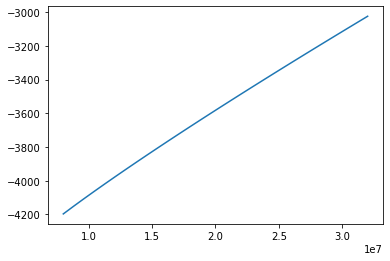

In [8]:
h = PropsSI('HMOLAR', 'T', T0, 'P', p, 'CO2')
s = PropsSI('SMOLAR', 'T', T0, 'P', p, 'CO2')
plt.plot(p, h-T0*s)

# Single-phase compressible flow
The single-phase compressible flow in porous media can be solved analytically using the transformation suggested by Al-huseyni in his classic paper. The transformation reads:
$$ m\left(p\right)=\frac{1}{\left(\rho/\mu\right)_{r}}\int_{p_{r}}^{p}\frac{\rho}{\mu}\mathrm{d}p$$
This is shown in the following figure.

In [9]:
p_r = 1e5 # Pa reference pressure
p_res = 200e5 # Pa reservoir pressure
T_res = 70+273.15 # K
p_max = 5*p_res # Pa maximum pressure
p_range = np.linspace(p_r, p_max, 50)
rho = PropsSI('DMASS', 'T', T_res, 'P', p_range, 'CO2')
mu = PropsSI('V', 'T', T_res, 'P', p_range, 'CO2')
rho_mu = np.cumsum(rho/mu)
m = np.zeros(mu.size)
for i in range(mu.size):
    m[i] = np.trapz(p_range[0:i], rho_mu[0:i])/(rho_mu[0])

Text(0, 0.5, 'Pseudo pressure [Pa]')

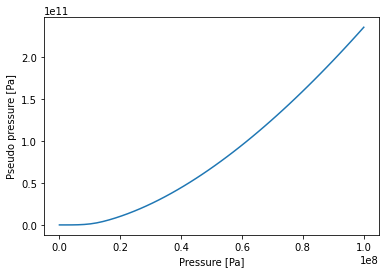

In [10]:
plt.plot(p_range, m)
plt.xlabel('Pressure [Pa]')
plt.ylabel('Pseudo pressure [Pa]')

The above transformation changes the single-phase compressible flow equation that has the form
$$\frac{\partial\left(\rho\varphi\right)}{\partial t}+\nabla.\left(\rho\mathbf{u}\right)=0$$
with Darcy velocity in the absence of gravity is defined by
$$\mathbf{u}=-\frac{k}{\mu}\left(\nabla p\right)$$
to 
$$\frac{\partial m}{\partial t}-D_{h}\nabla.\left(\nabla m\right)=0$$
in which $D_h$ is defined as 
$$D_{h}=\frac{k}{\varphi\mu c}$$
The parameter $c$ is called the fluid compressibility and is defined by
$$c=\frac{1}{\rho}\frac{\partial\rho}{\partial p}$$
For carbon dioxide, the plot of density versus presure is shown in the following figure:

Text(0, 0.5, 'Density [kg/m$^3$]')

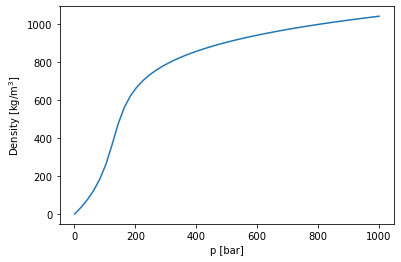

In [12]:
plt.plot(p_range/1e5, rho)
plt.xlabel('p [bar]')
plt.ylabel('Density [kg/m$^3$]')
# Density at reservoir temperature of T_res

The solution for a raial field with one injector/producer reads
$$m_{i}-m\left(r,t\right)=-\frac{q_{sc}\left(\mu B\right)_{r}}{4\pi kh}\textrm{Ei}\left(-\frac{r^{2}}{4D_{h}t}\right)$$
where the integral term is defined by
$$\textrm{Ei}\left(-x\right)=-\int_{x}^{\infty}\frac{e^{-u}}{u}\textrm{d}u$$

In [ ]:
from scipy.special import expi, exp1

Note
$$\textrm{Ei}\left(x\right)=\int_{x}^{\infty}\frac{e^{-u}}{u}\textrm{d}u$$
and
$$E_1(x)=-Ei(-x)$$